In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from gloess_fits import fit_one_band
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
lc_df = pd.read_csv('final_data_files/lightcurves.csv')
offset_dict = {'j':4,'h':3,'k':2,'3':1,'4':0}
name_dict = {'j':'J','h':'H','k':'K_s','3':'[3.6]','4':'[4.5]'}
cmap = plt.cm.get_cmap('gist_rainbow')
plot_colors = list(reversed([cmap(i) for i in np.linspace(0,0.91,5)]))
color_dict = {'j':plot_colors[0],'h':plot_colors[1],'k':plot_colors[2],'3':plot_colors[3],'4':plot_colors[4]}

In [3]:
#star = 21
#startype = 'RRab'
def plot_the_thing(star,startype,name_dict=name_dict,offset_dict=offset_dict,color_dict=color_dict):
    fig, ax = plt.subplots(1,1,figsize=(6,6))
    ax.set_xlim(-0.1,3.1)
    med_mags = []
    for band in name_dict.keys():
        base = '{}_{}'.format(star,band)
        n = len(lc_df['{}_phase'.format(base)])
        data1, x, y, yerr, xphase = fit_one_band(lc_df['{}_mags'.format(base)],np.ones(n)*99,
                                                 lc_df['{}_phase'.format(base)],n,0.2)
        med_mags.append(np.median(data1[100:])-offset_dict[band])
        ppl.plot(x[100:]-1,data1[100:]-offset_dict[band],'k-')
        ppl.plot(x[400:],data1[400:]-offset_dict[band],'k-')
        for i in range(3):
            ppl.errorbar(lc_df['{}_phase'.format(base)]+i,lc_df['{}_mags'.format(base)]-offset_dict[band],
                         fmt='o',color=color_dict[band])
    ax.set_ylim(np.max(med_mags)+0.5,np.min(med_mags)-0.5)
    ax2 = ax.twinx()
    ax2.set_ylim(ax.get_ylim())
    ax2.set_xlim(ax.get_xlim())
    ax2.set_yticks(med_mags)
    ax2.axes.yaxis.set_ticks_position('none')
    ax2.set_yticklabels(['${} - {}$'.format(name_dict[k],offset_dict[k]) if (k!='4')
                         else '${}$'.format(name_dict[k]) for k in name_dict.keys()])
    ax.set_xlabel('Phase')
    ax.set_ylabel('Apparent magnitude')
    ax.set_title('V{}, {}'.format(star,startype))
    fig.tight_layout()
    fig.savefig('final_plots/V{}_light_curves.eps'.format(star))
    fig.clf()

In [4]:
rrc_list = [20, 30, 98, 119]
for star in rrc_list:
    plot_the_thing(star,'RRc')

gloess_fits.py:104: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  yerr = err[data<50]


Failed for 4
Failed for 25
Failed for 34
Failed for 102
Failed for 114
Failed for 122


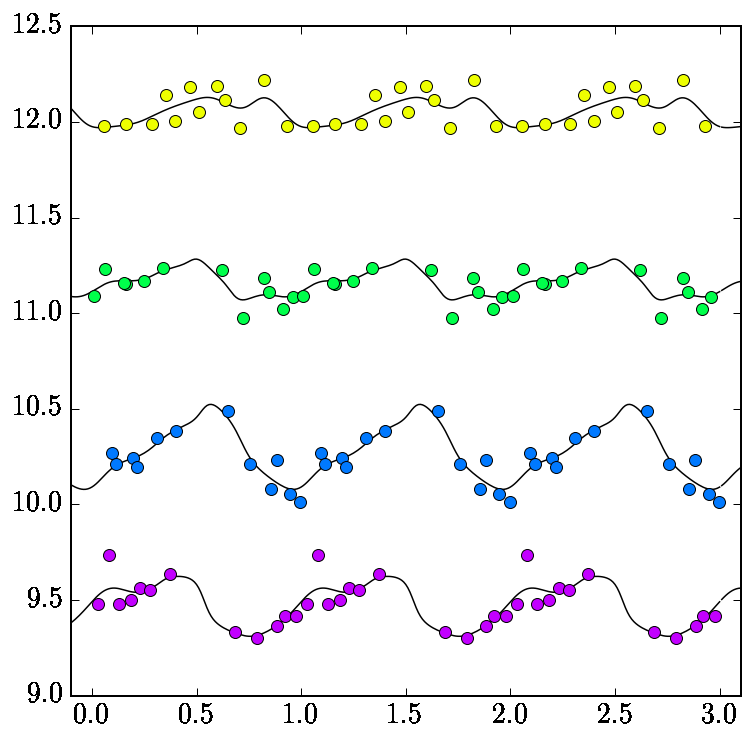

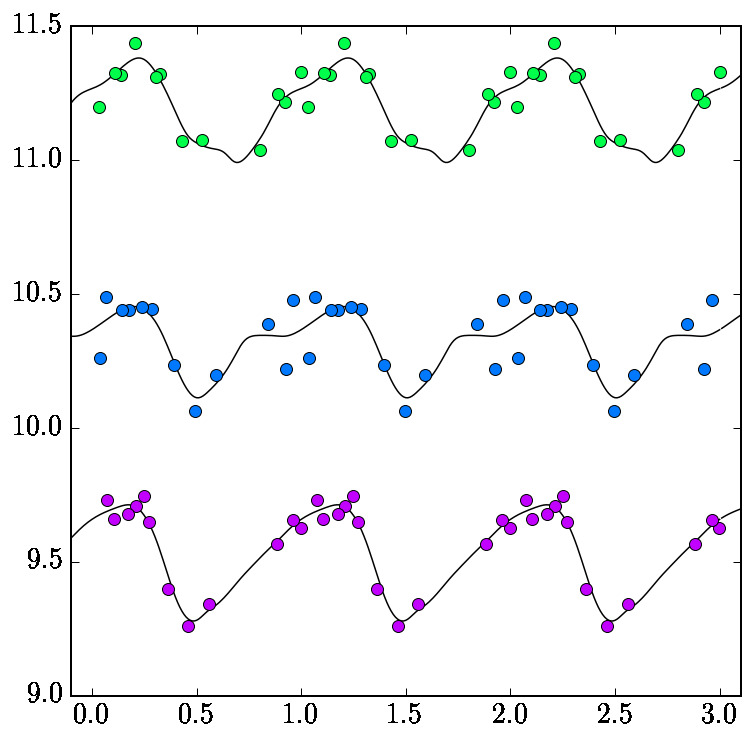

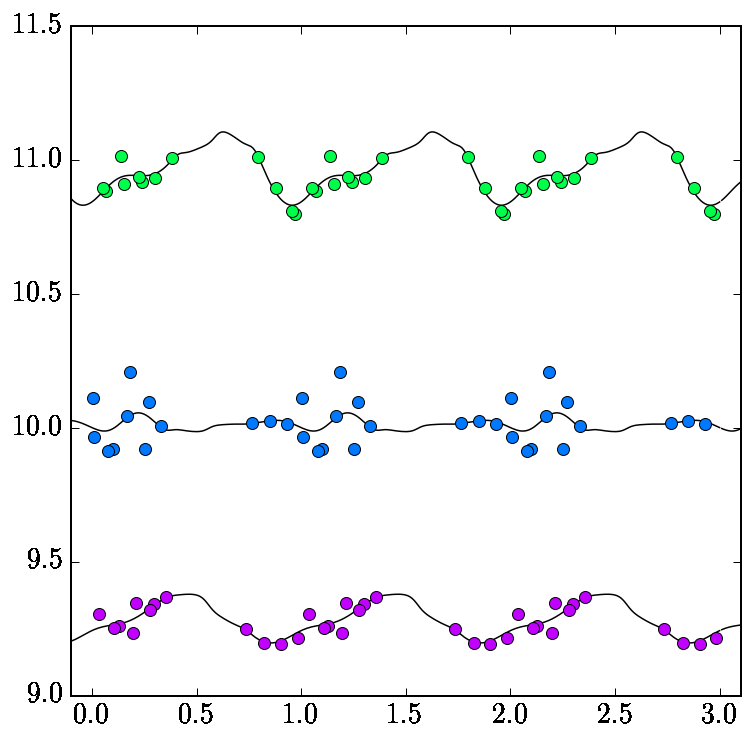

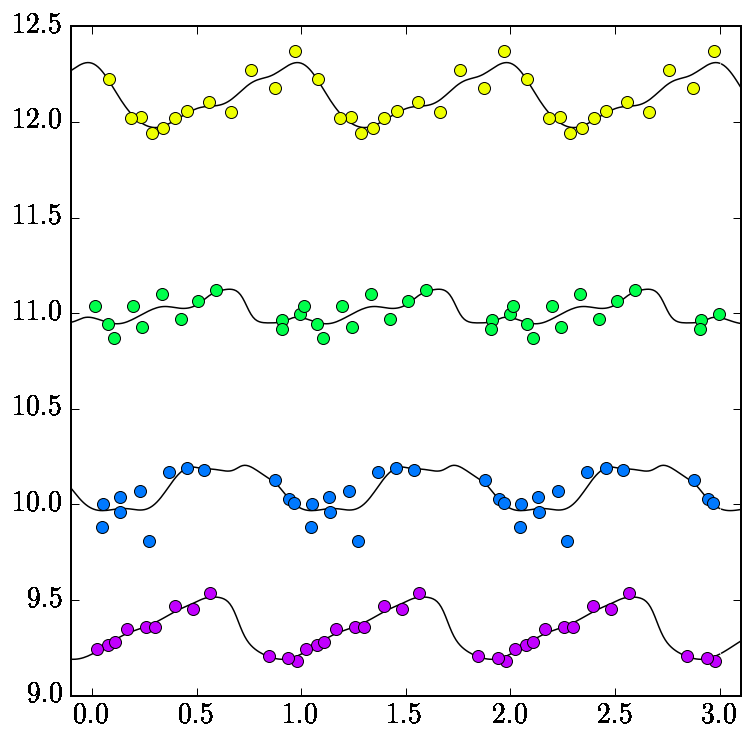

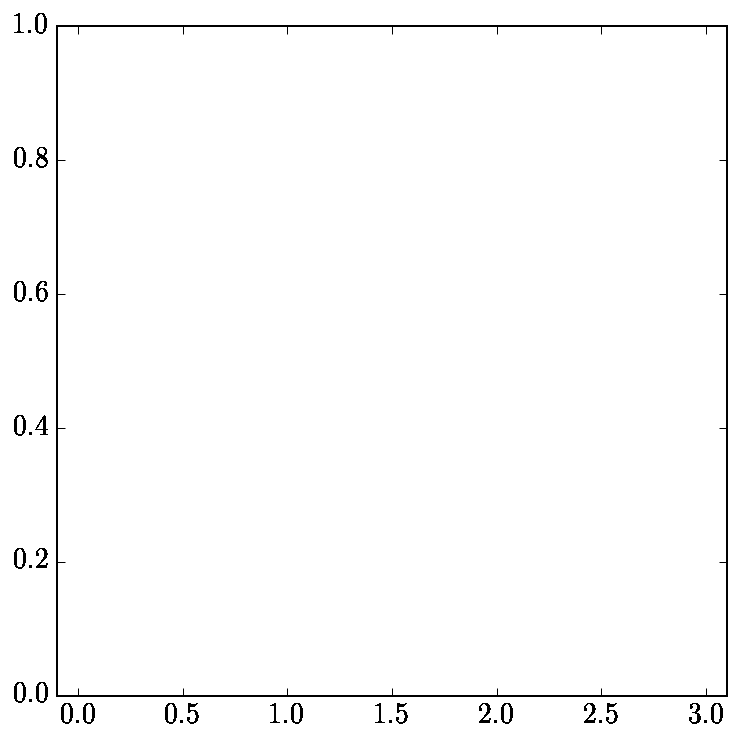

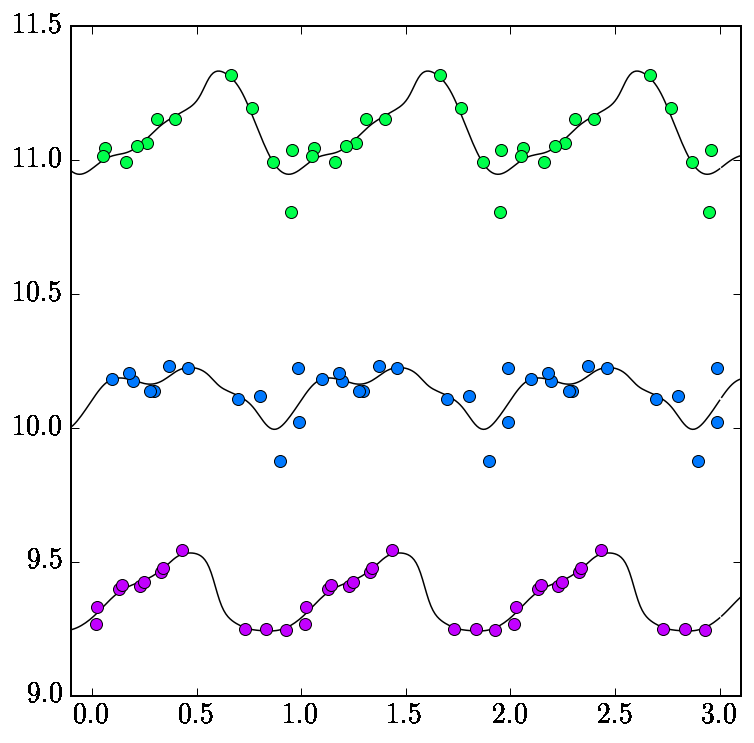

In [5]:
rrab_list = [4, 9, 13, 15, 19, 21, 25, 34, 102, 114, 118, 120, 122, 263, 366]
for star in rrab_list:
    try:
        plot_the_thing(star,'RRab')
    except:
        print 'Failed for', star
